In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [16, 12]

In [14]:
DOTS = [{
    "val": 100,
    "x": 40,
    "y": 40
},{
    "val": 100,
    "x": 60,
    "y": 60
},{
    "val": -50,
    "x": 70,
    "y": 30
}]

SIZE = (100, 100)
EPS = 1

In [15]:
field = np.zeros(SIZE)

for dot in DOTS:
    field[dot["y"], dot["x"]] = dot["val"]
X = np.arange(0, SIZE[0], 1)
Y = np.arange(0, SIZE[0], 1)
X, Y = np.meshgrid(X, Y)
V_sum_prev = field.sum()

In [16]:
while True:
    field[1:-1, 1:-1] = field[2:, 1:-1] / 4 + field[:-2, 1:-1] / 4 + field[1:-1, 2:] / 4 + field[1:-1, :-2] / 4
    for dot in DOTS:
        field[dot["y"], dot["x"]] = dot["val"]

    if abs(field.sum() - V_sum_prev) < EPS:
        break 
    V_sum_prev = field.sum()

    print(f"\rV_div: {abs(field.sum() - V_sum_prev)}", end="")
    

V_div: 0.0

Text(0.5, 0, 'Распределение электрического потенциала, В')

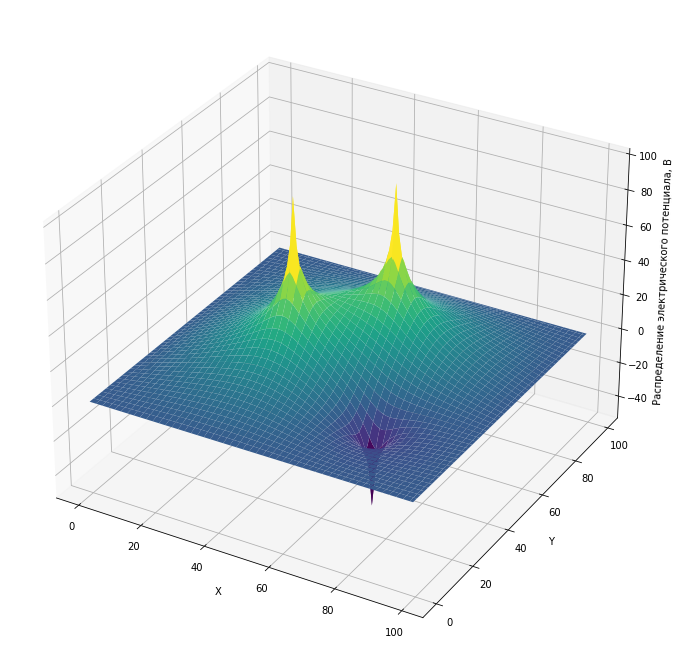

In [17]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, field, rstride=2, cstride=2,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("Распределение электрического потенциала, В")


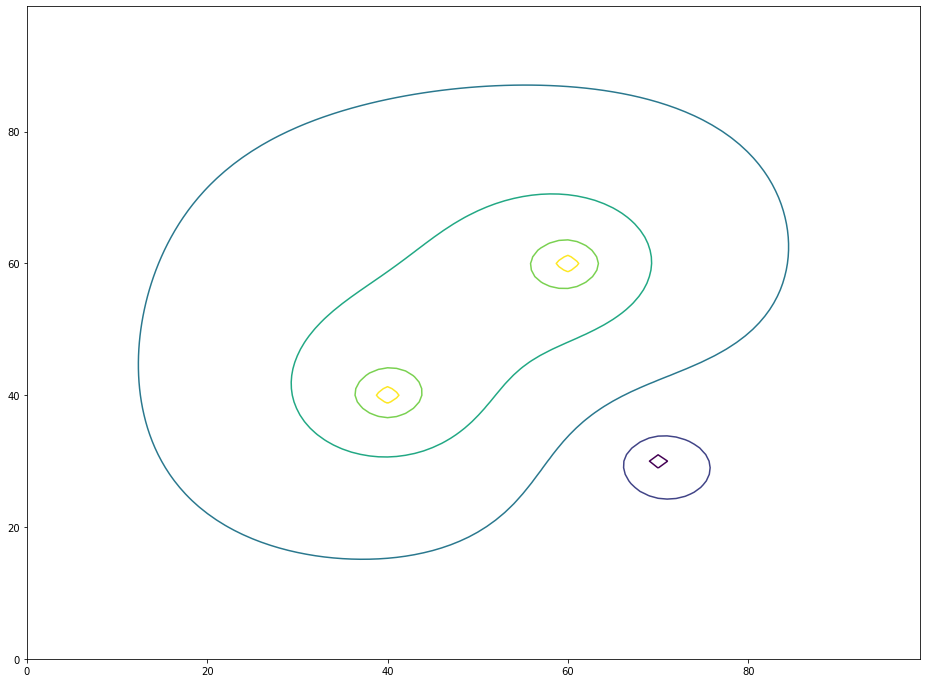

In [84]:
ax = plt.axes()
ax.contour(X, Y, field, levels=[-30, -10, 10, 30, 50, 70])